# Plotting Ascension

This script should extract the data from the IDMLogger_ascension.csv in the ./data folder

Data:
time, x, x_desired, q, q_desired, J, W, q_motor_currents

Jake Sganga
11/11/2015



### Note
using pandas.ipynb from CME193 as framework

In [14]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import mpld3
# mpld3.enable_notebook()

sns.set_style("dark")
sns.set_context("talk")

## Ascension Data

Auto generated when we call the get_position function, which returns the asynchronous data dict

In [15]:
mag = pd.read_csv('IDMLogger_ascension.csv')

In [16]:
mag.head()
np.size(mag.time)

0

(-20, 20, -20, 20)

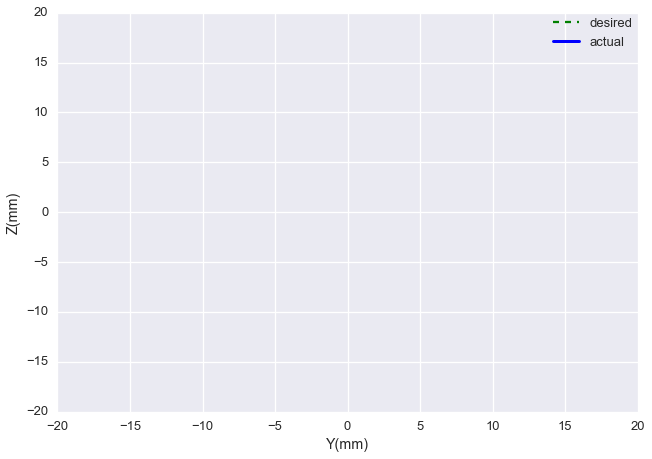

In [17]:
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm



# plt.plot(mag.y, mag.z, '-')
# plt.plot(mag.y_desired, mag.z_desired, 'o--')
t = np.linspace(2, 10, len(mag.y))

points = np.array([mag.y, mag.z]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

lc = LineCollection(segments, cmap=plt.get_cmap('Blues'),
                    norm=plt.Normalize(0, 10))
lc.set_array(t)
lc.set_linewidth(3)
lc.set_label('actual')
plt.gca().add_collection(lc)
plt.plot(mag.y_desired[1:], mag.z_desired[1:], 'g--', label = 'desired')
plt.legend(loc=0, borderaxespad=0)
plt.grid(True)
plt.xlabel('Y(mm)')
plt.ylabel('Z(mm)')
side = 20
plt.axis((-side,side,-side,side))

In [18]:

# In [46]:# -- can index using dot notation!
print(mag.x[:10], mag.x_desired[:10])

Series([], Name: x, dtype: object) Series([], Name: x_desired, dtype: object)


note on this plot: the jagged 90 deg moves for x_desired is likely stemming from the button 'A' - homing command, which leaves the normal loop and, therefore, does not update the x_desired.

skeptical about this plot becuase it calculates x_desired as x_current + dx_desired (which is quite small)

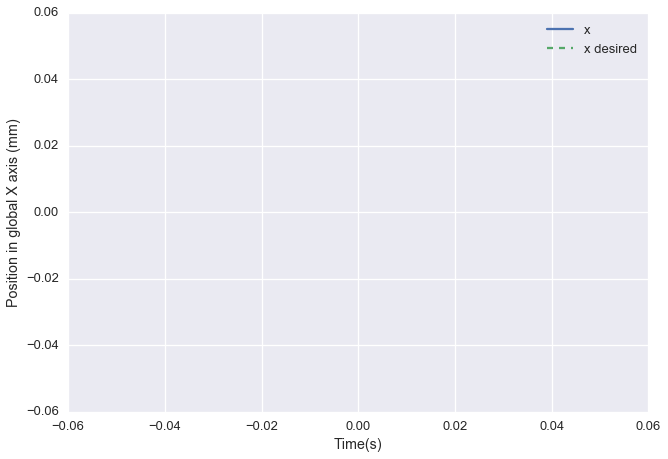

In [19]:
plt.plot(mag.time, mag.x, '-')
plt.plot(mag.time, mag.x_desired, '--')
plt.legend(['x', 'x desired'])
plt.grid(True)
plt.xlabel('Time(s)')
plt.ylabel('Position in global X axis (mm)')

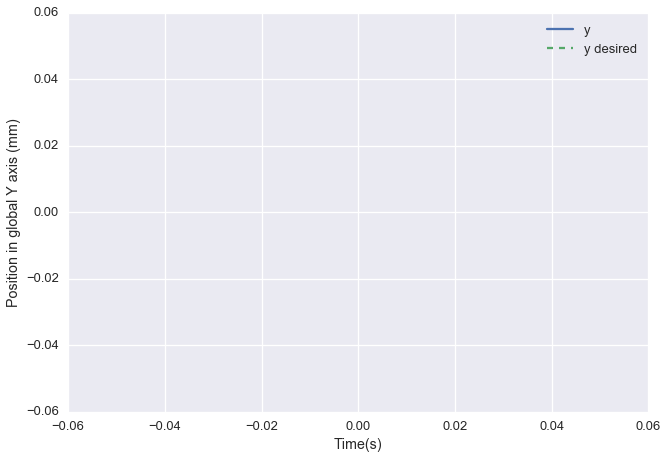

In [20]:
plt.plot(mag.time, mag.y,'-')
plt.plot(mag.time, mag.y_desired, '--')
plt.legend(['y', 'y desired'])
plt.grid(True)
plt.xlabel('Time(s)')
plt.ylabel('Position in global Y axis (mm)')

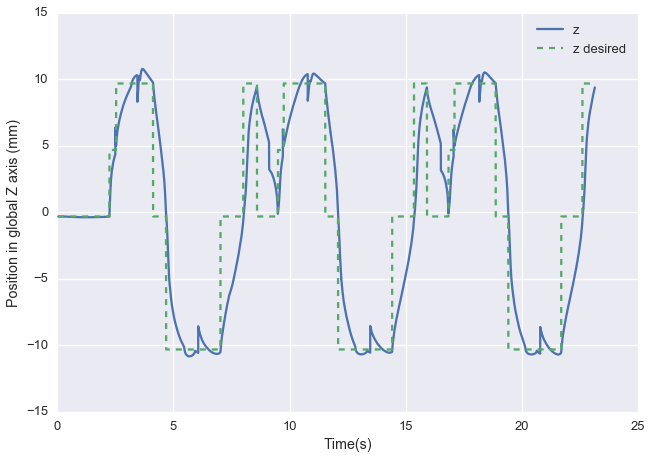

In [11]:
plt.plot(mag.time, mag.z,'-')
plt.plot(mag.time, mag.z_desired, '--')
plt.legend(['z', 'z desired'])
plt.grid(True)
plt.xlabel('Time(s)')
plt.ylabel('Position in global Z axis (mm)')

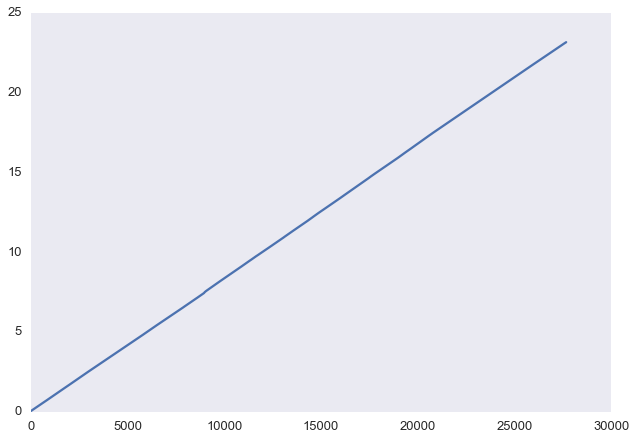

In [12]:
plt.plot(mag.time)

AttributeError: 'DataFrame' object has no attribute 'azimuth'

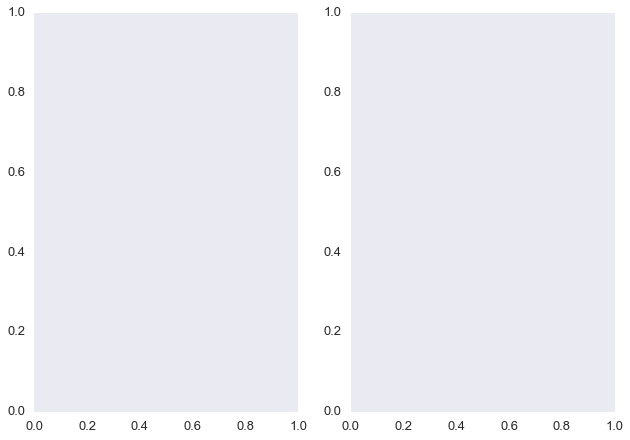

In [13]:
f, (ax1, ax2) = plt.subplots(1, 2)
# if 'azimuth' in mag.index:
ax1.plot(mag.time, mag.azimuth)
ax1.plot(mag.time, mag.azimuth_desired, '--')
ax1.legend(['azimuth', 'azimuth desired'])
ax1.grid(True)
# 
# ax1.xlabel('Time(s)')
# ax1.ylabel('Azimuth Angle (deg)')
# if 'elevation' in mag.index:
ax2.plot(mag.time, mag.elevation)
ax2.plot(mag.time, mag.elevation_desired, '--')
ax2.legend(['elevation', 'elevation desired'])
ax2.grid(True)
# ax2.xlabel('Time(s)')
# ax2.ylabel('Elevation Angle (deg)')

In [ ]:
# plt.plot(mag.time[:-1], dx - dx_desired)
# # plt.plot(mag.time, mag.azimuth_desired, '--')
# plt.legend(['dx - dx_desired'])
# plt.grid(True)
# plt.xlabel('Time(s)')
# plt.ylabel('X (mm)')

In [ ]:
# plt.plot(mag.time, mag.q4_amps, '.-')
# # plt.plot(mag.time, mag.azimuth_desired, '--')
# plt.legend(['current in q0'])
# plt.grid(True)
# plt.xlabel('Time(s)')
# plt.ylabel('Current (A)')

In [ ]:
plt.plot(mag.time, mag.J0)
plt.plot(mag.time, mag.J1)
plt.plot(mag.time, mag.J4)
plt.plot(mag.time, mag.J5)
plt.plot(mag.time, mag.J8)
# plt.plot(mag.time, mag.azimuth_desired, '--')
plt.legend(['q0', 'q1', 'q4', 'q5'])
plt.grid(True)
plt.xlabel('Time(s)')
plt.ylabel('Weight in X direction')

In [ ]:
plt.plot(mag.time, mag.J10)
plt.plot(mag.time, mag.J11)
plt.plot(mag.time, mag.J13)
plt.plot(mag.time, mag.J14)
# plt.plot(mag.time, mag.J17)
# plt.plot(mag.time, mag.azimuth_desired, '--')
plt.legend(['q0', 'q1', 'q4', 'q5'])
plt.grid(True)
plt.xlabel('Time(s)')
plt.ylabel('Weight in X direction')

Not sure what the best way will be to graphically visualize the Jacobian

In [ ]:
# print(mag.columns)

In [ ]:
# print([(i, name) for i, name in enumerate(mag.columns)])

A little clunky right now, but this shows that the columns for each J is: (29:74)

In [ ]:
# J_array = [np.asarray(mag.iloc[i,29:74]) for i in range(len(mag.time))]

In [ ]:
# print(len(J_array))

In [ ]:
plt.plot(mag.time, mag.q0)
plt.plot(mag.time, mag.q1)
plt.plot(mag.time, mag.q2)
# plt.plot(mag.time, mag.q4)
# plt.plot(mag.time, mag.q5)
# plt.plot(mag.time, mag.q8)


# plt.plot(mag.time, mag.azimuth_desired, '--')
plt.legend(['q0', 'q1', 'q2','q4', 'q5'])
plt.grid(True)
plt.xlabel('Time(s)')
plt.ylabel('Q values')

In [ ]:
plt.plot(mag.time, mag.q8)
plt.grid(True)

In [ ]:
# mag2 = pd.read_csv('IDMLogger_ascension_mlc.csv')

In [ ]:
# plt.plot(mag.y, mag.z, '.-')
# plt.plot(mag.y_desired, mag.z_desired, 'o--')
# plt.plot(mag2.y, mag2.z, 'r')
# plt.legend(['actual', 'desired', 'pure MLC'])
# plt.grid(True)
# plt.xlabel('Y(mm)')
# plt.ylabel('Z(mm)')

In [ ]:
plt.plot(mag.y, mag.z, '-')
plt.plot(mag.y_desired, mag.z_desired, 'o--')
plt.legend(['actual', 'desired'])
plt.grid(True)
plt.xlabel('Y(mm)')
plt.ylabel('Z(mm)')
side = 20
plt.axis((-side,side,-side,side))

In [ ]:
# plt.plot(mag.y_raw, mag.z_raw)
plt.plot(mag.y, mag.z, '-')
plt.plot(mag.y_desired, mag.z_desired, 'o--')

plt.plot(mag.y_part, mag.z_part, '-.')
plt.plot(mag.y_true, mag.z_true, '-')
# plt.plot(mag.y_raw, mag.z_raw, '.')
plt.legend(['actual', 'desired', 'particle','true', 'raw'])
plt.grid(True)
plt.xlabel('Y(mm)')
plt.ylabel('Z(mm)')

In [ ]:
i = 7000
plt.plot(mag.y_h[:i],'-')
plt.plot(mag.y_h_est[:i], '.--')

plt.grid(True)
plt.xlabel('time')
plt.ylabel('heart dist')

In [ ]:
# plt.plot(mag.H1,'-')
# plt.plot(mag.H2, '--')
# plt.plot(mag.H3,'-')
# plt.plot(mag.H4, '--')

# plt.grid(True)
# plt.xlabel('time')
# plt.ylabel('heart dist')

# plt.grid(True)
# plt.xlabel('time')
# plt.ylabel('heart dist')

In [ ]:
plt.plot(mag.x_h,'-')
plt.plot(mag.x_h_est, '--')

plt.grid(True)
plt.xlabel('time')
plt.ylabel('heart dist')
# mpld3.display()

In [ ]:
plt.plot(mag.z_h,'.-')
plt.plot(mag.z_h_est, '.--')

plt.grid(True)
plt.xlabel('time')
plt.ylabel('heart dist')
# mpld3.display()

In [ ]:
plt.plot(mag.y_h, mag.z_h, '-')
plt.plot(mag.y_h_est, mag.z_h_est, '--')

plt.grid(True)
plt.xlabel('time')
plt.ylabel('heart dist')

In [ ]:
plt.plot(mag.x, '-')
plt.grid(True)

In [ ]:
print(len(mag.x))

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2)
# if 'azimuth' in mag.index:
ax1.plot(mag.azimuth_h)
ax1.plot(mag.azimuth_h_est, '--')
ax1.legend(['azimuth', 'azimuth desired'])
ax1.grid(True)
# 
# ax1.xlabel('Time(s)')
# ax1.ylabel('Azimuth Angle (deg)')
# if 'elevation' in mag.index:
ax2.plot(mag.elevation_h)
ax2.plot(mag.elevation_h_est, '--')
ax2.legend(['elevation', 'elevation desired'])
ax2.grid(True)
# ax2.xlabel('Time(s)')
# ax2.ylabel('Elevation Angle (deg)')

In [ ]:
plt.plot(mag.dy)
plt.plot(mag.dy_desired)

In [ ]:
points = np.array([mag.x, mag.z]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

lc = LineCollection(segments, cmap=plt.get_cmap('Blues'),
                    norm=plt.Normalize(0, 10))
lc.set_array(t)
lc.set_linewidth(3)
lc.set_label('actual')
plt.gca().add_collection(lc)
plt.plot(mag.x_desired, mag.z_desired, 'go--', label = 'desired')
plt.legend(loc=0, borderaxespad=0)
plt.grid(True)
plt.xlabel('X(mm)')
plt.ylabel('Z(mm)')
plt.axis('equal')
side = 20

# plt.axis((-side,side,-side,side))

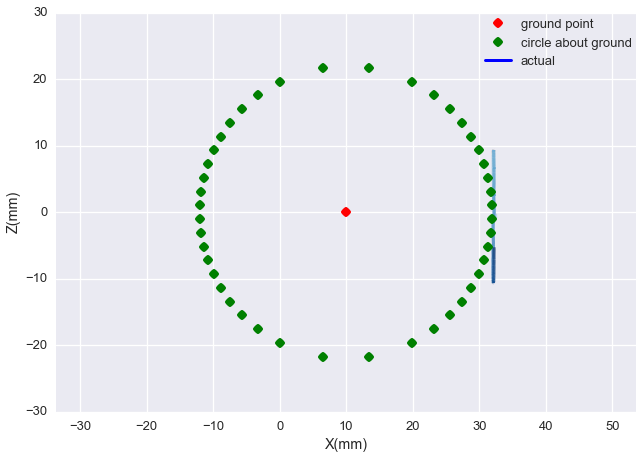

In [22]:
points = np.array([mag.x, mag.z]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

lc = LineCollection(segments, cmap=plt.get_cmap('Blues'),
                    norm=plt.Normalize(0, 10))
lc.set_array(t)
lc.set_linewidth(3)
lc.set_label('actual')
plt.gca().add_collection(lc)
plt.grid(True)
plt.xlabel('X(mm)')
plt.ylabel('Z(mm)')
plt.axis('equal')
side = 20

z_circle = np.linspace(-30, 30, 30)
r = 22
x_ground = 10
z_ground = 0
x_circle = np.sqrt(r**2 - z_circle**2) + x_ground
x_circle_neg = -np.sqrt(r**2 - z_circle**2) + x_ground

z_circle = np.hstack((z_circle, z_circle))
x_circle = np.hstack((x_circle, x_circle_neg))

# print(z_circle)
plt.plot(x_ground, z_ground, 'ro', label = 'ground point')
plt.plot(x_circle, z_circle, 'og', label = 'circle about ground')
plt.legend(loc=0, borderaxespad=0)


# plt.axis((-side,side,-side,side))

In [ ]:
points = np.array([mag.azimuth, mag.elevation]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

lc = LineCollection(segments, cmap=plt.get_cmap('Blues'),
                    norm=plt.Normalize(0, 10))
lc.set_array(t)
lc.set_linewidth(3)
lc.set_label('actual')
plt.gca().add_collection(lc)
# plt.plot(mag.azimuth_desired[1:], mag.elevation_desired[1:], 'go', label = 'desired')
plt.legend(loc=0, borderaxespad=0)
plt.grid(True)
plt.xlabel('Y(mm)')
plt.ylabel('Z(mm)')
side = 20
# plt.axis((-side,side,-side,side))

In [ ]:
# plt.plot(mag.z_desired)
# plt.plot(mag.y_desired)
# plt.plot(mag.x_desired)
# plt.plot(mag.azimuth_desired)



# plt.grid(True)
# mpld3.display()

(-20, 20, -20, 20)

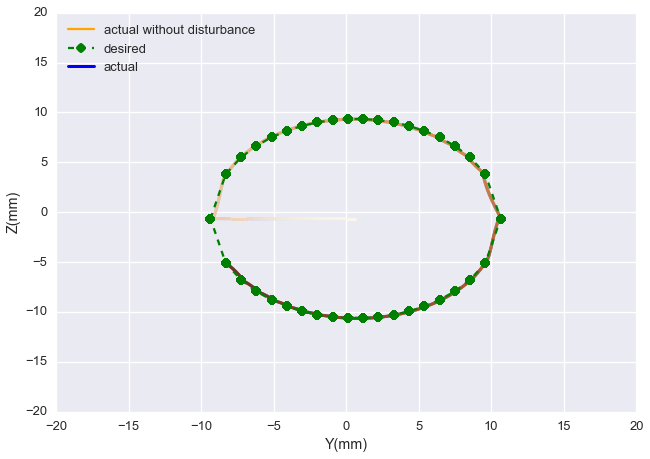

In [21]:
from matplotlib.legend_handler import HandlerLine2D

t = np.linspace(0, 10, len(mag.y))

points = np.array([mag.y, mag.z]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

lc = LineCollection(segments, cmap=plt.get_cmap('Blues'),
                    norm=plt.Normalize(0, 10))
lc.set_array(t)
lc.set_linewidth(3)
lc.set_label('actual')
plt.gca().add_collection(lc)

points = np.array([mag.y_true, mag.z_true]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

lc = LineCollection(segments, cmap=plt.get_cmap('Oranges'),
                    norm=plt.Normalize(0, 10))
lc.set_array(t)
lc.set_linewidth(3)
# lc.set_label('actual without disturbance')
plt.gca().add_collection(lc)

plt.plot([-100, -110], [-100,-100], 'orange', label = 'actual without disturbance')

plt.plot(mag.y_desired[1:], mag.z_desired[1:], 'go--', label = 'desired')
plt.legend(loc=2)

plt.grid(True)
plt.xlabel('Y(mm)')
plt.ylabel('Z(mm)')
side = 20
plt.axis((-side,side,-side,side))